In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt

In [2]:
file_name = ['dataset/1_idle_data.csv', 'dataset/2_minor_vibration_data.csv', 'dataset/3_hard_data.csv', 'dataset/4_soft_data.csv']

dataframes = []

status = ['idle', 'minor_vibration', 'hard_concrete', 'soft_concrete']

for file in file_name:
    df = pd.read_csv(file)
    if file == "dataset/1_idle_data.csv": 
        df['status'] = status[0]
    elif file == "dataset/2_minor_vibration_data.csv": 
        df['status'] = status[1]
    elif file == "dataset/3_hard_data.csv":
        df['status'] = status[2]
    else:
        df['status'] = status[3]
    dataframes.append(df)
 


In [3]:
df = pd.concat(dataframes, ignore_index=True)
df.to_csv('accelerometer_dataset.csv', index=False)


In [ ]:
# Idle: Near-zero values with very small random noise.
# Minor Vibration: Small fluctuations that mimic slight movement.
# Soft Concrete: Moderate consistent vibration values.
# Hard Concrete: Higher consistent vibration values.

In [ ]:
#Add noise
def generate_idle_data(size):
    return np.random.normal(0, 0.05, size=size)

def generate_minor_vibration_data(size):
    return np.random.normal(0.1, 0.02, size=size)

def generate_soft_concrete_data(size):
    return np.random.normal(0.5, 0.1, size=size)

def generate_hard_concrete_data(size):
    return np.random.normal(1.0, 0.15, size=size)

def update_realistic_data(row):
    size = 1
    if row['status'] == 'idle':
        row['x'], row['y'], row['z'] = generate_idle_data(size)[0], generate_idle_data(size)[0], generate_idle_data(size)[0]
    elif row['status'] == 'minor vibration':
        row['x'], row['y'], row['z'] = generate_minor_vibration_data(size)[0], generate_minor_vibration_data(size)[0], generate_minor_vibration_data(size)[0]
    elif row['status'] == 'soft_concrete':
        row['x'], row['y'], row['z'] = generate_soft_concrete_data(size)[0], generate_soft_concrete_data(size)[0], generate_soft_concrete_data(size)[0]
    elif row['status'] == 'hard_concrete':
        row['x'], row['y'], row['z'] = generate_hard_concrete_data(size)[0], generate_hard_concrete_data(size)[0], generate_hard_concrete_data(size)[0]
    return row

realistic_data = df.apply(update_realistic_data, axis=1)


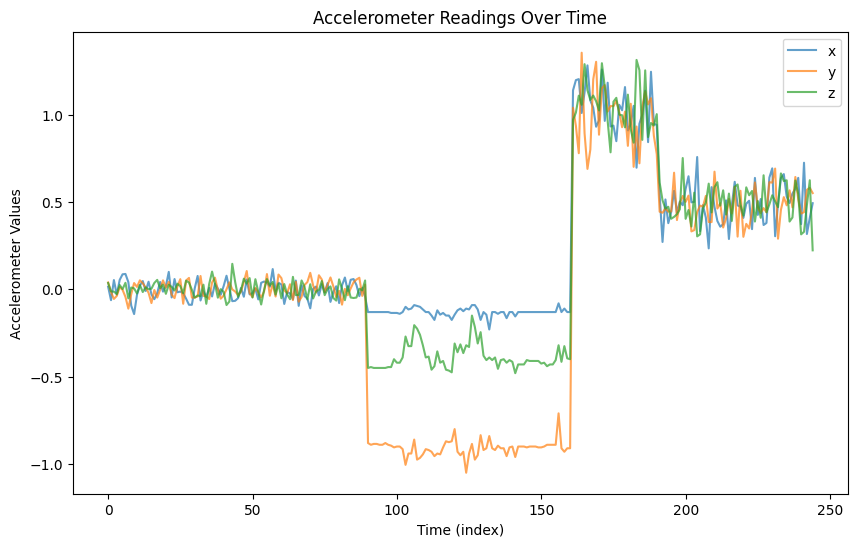

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(realistic_data.index, realistic_data['x'], label='x', alpha=0.7)
plt.plot(realistic_data.index, realistic_data['y'], label='y', alpha=0.7)
plt.plot(realistic_data.index, realistic_data['z'], label='z', alpha=0.7)
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Time (index)')
plt.ylabel('Accelerometer Values')
plt.legend()
plt.show()


**Generate more data using Faker Package**

In [2]:
original_data_path = 'accelerometer_dataset.csv'
original_data = pd.read_csv(original_data_path)

In [5]:
fake= Faker()

def calculate_baseline_stats(data):
    stats = {}
    statuses = data['status'].unique()
    for status in statuses:
        subset = data[data['status'] == status]
        stats[status] = {
            'x_mean': subset['x'].mean(),
            'x_std': subset['x'].std(),
            'y_mean': subset['y'].mean(),
            'y_std': subset['y'].std(),
            'z_mean': subset['z'].mean(),
            'z_std': subset['z'].std(),
        }
    return stats

baseline_stats = calculate_baseline_stats(original_data)

def generate_data_from_baseline(baseline_stats, rows_per_status):
    synthetic_data = []
    for status, stats in baseline_stats.items():
        x = np.random.normal(stats['x_mean'], stats['x_std'], size=rows_per_status)
        y = np.random.normal(stats['y_mean'], stats['y_std'], size=rows_per_status)
        z = np.random.normal(stats['z_mean'], stats['z_std'], size=rows_per_status)
        for i in range(rows_per_status):
            synthetic_data.append({
                'x': x[i],
                'y': y[i],
                'z': z[i],
                'status': status,
            })
    return pd.DataFrame(synthetic_data)

synthetic_data = generate_data_from_baseline(baseline_stats, 25000)


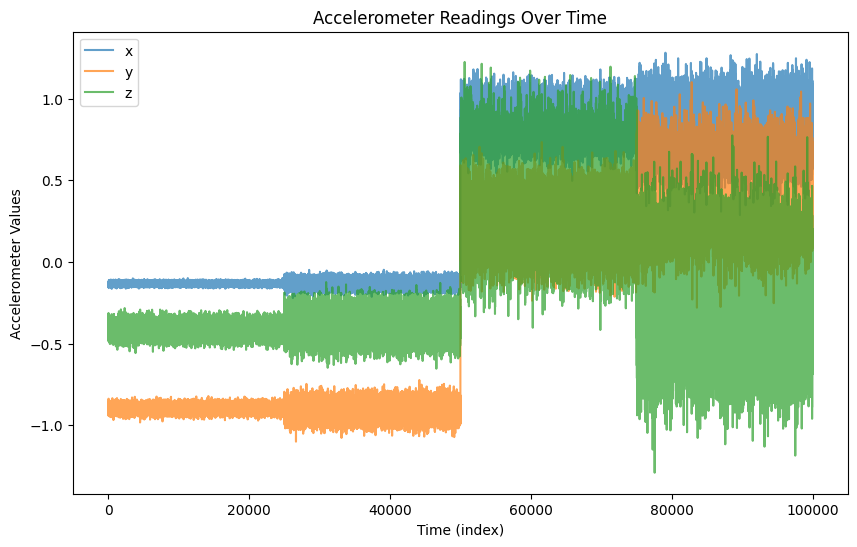

In [3]:
df = pd.read_csv('synthetic_data.csv')

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['x'], label='x', alpha=0.7)
plt.plot(df.index, df['y'], label='y', alpha=0.7)
plt.plot(df.index, df['z'], label='z', alpha=0.7)
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Time (index)')
plt.ylabel('Accelerometer Values')
plt.legend()
plt.show()


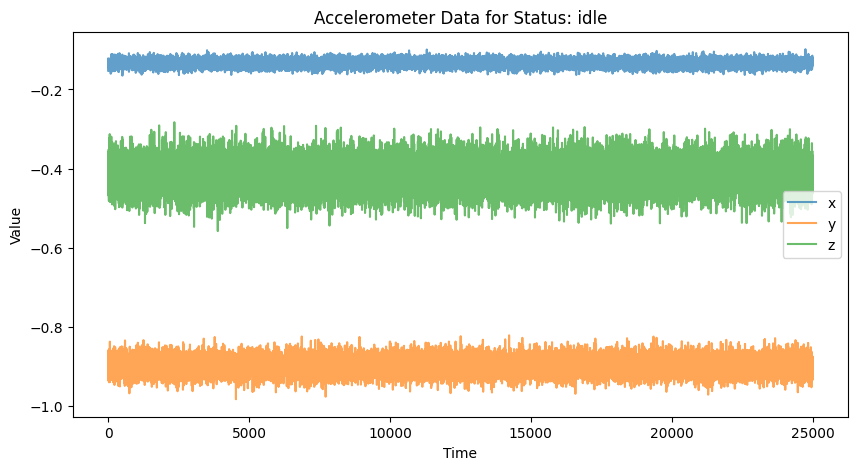

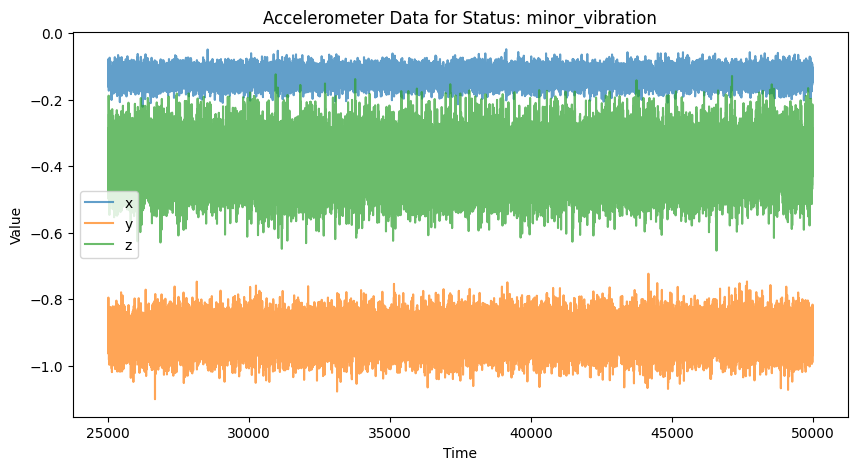

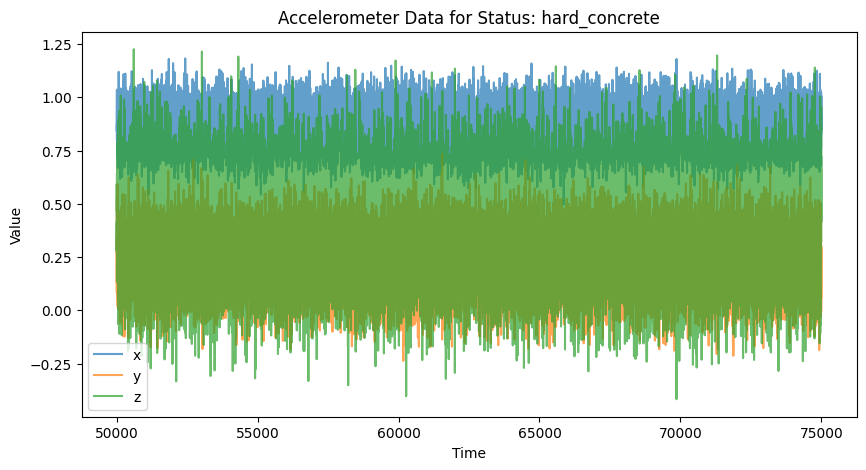

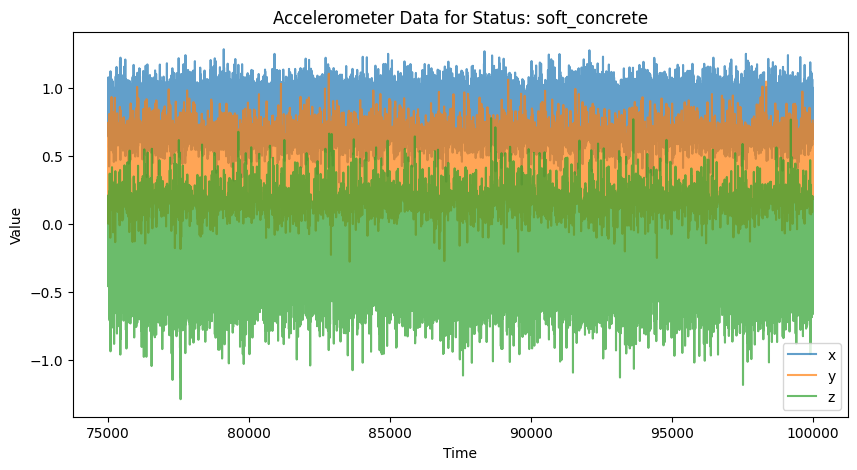

In [4]:
df['time'] = range(len(df))
statuses = df['status'].unique()

for status in statuses:
    subset = df[df['status'] == status]
    plt.figure(figsize=(10, 5))
    plt.plot(subset['time'], subset['x'], label='x', alpha=0.7)
    plt.plot(subset['time'], subset['y'], label='y', alpha=0.7)
    plt.plot(subset['time'], subset['z'], label='z', alpha=0.7)
    plt.title(f'Accelerometer Data for Status: {status}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [5]:
stats = df.groupby('status').agg(['mean', 'std', 'min', 'max'])
print(stats)


                        x                                       y            \
                     mean       std       min       max      mean       std   
status                                                                        
hard_concrete    0.863305  0.086667  0.496448  1.182363  0.230064  0.126380   
idle            -0.133624  0.008556 -0.164956 -0.098155 -0.898494  0.019549   
minor_vibration -0.130149  0.021780 -0.221153 -0.047934 -0.908774  0.043924   
soft_concrete    0.810122  0.130457  0.287347  1.282417  0.420183  0.168275   

                                            z                                \
                      min       max      mean       std       min       max   
status                                                                        
hard_concrete   -0.237391  0.735149  0.394052  0.213451 -0.416979  1.225764   
idle            -0.983824 -0.822054 -0.415388  0.035751 -0.558379 -0.282854   
minor_vibration -1.101480 -0.723636 -0.386447  0.06

In [ ]:
file_path = 'synthetic_data.csv'
synthetic_data.to_csv(file_path, index=False)